### Pandas 이해 : 행정구역 정보(CSV) 읽고, 분석하기
1. read_csv() 함수로 csv file read
2. 특정열과 특정행을 선택 - loc[], iloc[] 사용

In [124]:
import pandas as pd
print(pd.__version__)

data = pd.read_csv('data/data_draw_korea.csv')
print(type(data))
print(data.shape)

1.1.3
<class 'pandas.core.frame.DataFrame'>
(229, 8)


In [2]:
data.head(3)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시


In [3]:
data.tail()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
224,224,127462,제천,8,10,882.47,충청북도,제천시
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시
228,228,198077,충주,6,10,983.70,충청북도,충주시


In [4]:
print(f'컬럼명 {data.columns}')
print(f'인덱스 {data.index}')
print(type(data.values))
print(f'값 {data.values}')

컬럼명 Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')
인덱스 RangeIndex(start=0, stop=229, step=1)
<class 'numpy.ndarray'>
값 [[0 202520 '강릉' ... 1040.07 '강원도' '강릉시']
 [1 25589 '고성(강원)' ... 664.19 '강원도' '고성군']
 [2 86747 '동해' ... 180.01 '강원도' '동해시']
 ...
 [226 62809 '진천' ... 406.08 '충청북도' '진천군']
 [227 790216 '청주' ... 932.51 '충청북도' '청주시']
 [228 198077 '충주' ... 983.7 '충청북도' '충주시']]


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB


In [7]:
data.describe()

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [17]:
# 인구수 컬럼 선택
print(f"Max : {data['인구수'].max()}")
print(f"Min : {data['인구수'].min()}")
print(f"평균 : {data['인구수'].mean()}")
print(f"표준편차 : {data['인구수'].std()}")
print(f"중간값 : {data['인구수'].median()}")
print(f"합계 : {data['인구수'].sum()}")

Max : 1125461
Min : 8392
평균 : 211089.77729257641
표준편차 : 207437.8370475227
중간값 : 140159.0
합계 : 48339559


In [19]:
data['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [21]:
data['광역시도'].value_counts()

경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
대전광역시       5
광주광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: 광역시도, dtype: int64

In [23]:
# 경기도 인구수의 평균과 표준편차
data['광역시도'] == '경기도'

0      False
1      False
2      False
3      False
4      False
       ...  
224    False
225    False
226    False
227    False
228    False
Name: 광역시도, Length: 229, dtype: bool

In [34]:
print(type(data.loc[data['광역시도'] == '경기도','인구수':'면적']))
data.loc[data['광역시도'] == '경기도','인구수':'면적'].head(3)

<class 'pandas.core.frame.DataFrame'>


,인구수,shortName,x,y,면적
18,53497,가평,9,3,843.040
19,955384,고양,4,2,267.330
20,63227,과천,7,7,35.813


In [41]:
print(type(data.loc[data['광역시도'] == '경기도','인구수']))
print('경기도 인구 평균 : ', data.loc[data['광역시도'] == '경기도','인구수'].mean())
print('경기도 인구 표준편차 : ', data.loc[data['광역시도'] == '경기도','인구수'].std())

<class 'pandas.core.series.Series'>
경기도 인구 평균 :  378845.48387096776
경기도 인구 표준편차 :  304548.39514203876


### Data Selection
* 행과 열을 선택하기 (loc, iloc 사용하기)
* slicing(구간), 여러개 선택, 조건식

In [45]:
# 모든 행과 인구수, 행정구역 컬럼 선택
data.loc[:,['인구수','행정구역']]

,인구수,행정구역
0,202520,강릉시
1,25589,고성군
2,86747,동해시
3,63986,삼척시
4,76733,속초시
...,...,...
224,127462,제천시
225,34480,증평군
226,62809,진천군
227,790216,청주시


In [62]:
data.loc[0:10:2,'인구수':'행정구역']

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
2,86747,동해,11,5,180.01,강원도,동해시
4,76733,속초,9,1,105.25,강원도,속초시
6,24551,양양,10,2,628.68,강원도,양양군
8,313851,원주,10,7,867.30,강원도,원주시
10,34242,정선,11,6,1220.67,강원도,정선군


In [57]:
data.iloc[0:2,0:3]

,Unnamed: 0,인구수,shortName
0,0,202520,강릉
1,1,25589,고성(강원)


In [63]:
data.loc[[0,1,3],['인구수','행정구역']]

,인구수,행정구역
0,202520,강릉시
1,25589,고성군
3,63986,삼척시


In [70]:
# 서울특별시 인 행을 선택
data.loc[data['광역시도'] == '서울특별시'].sort_values(by='인구수',ascending=False)\
.reset_index(drop=True)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,141,615487,서울송파,8,6,33.90,서울특별시,송파구
1,127,554709,서울강서,4,4,41.40,서울특별시,강서구
2,132,547202,서울노원,6,1,35.44,서울특별시,노원구
3,124,526157,서울강남,6,7,39.50,서울특별시,강남구
4,128,484478,서울관악,5,6,29.60,서울특별시,관악구
5,145,464236,서울은평,4,3,29.70,서울특별시,은평구
6,142,453634,서울양천,4,5,17.40,서울특별시,양천구
7,140,434061,서울성북,6,2,24.57,서울특별시,성북구
8,125,432028,서울강동,8,5,24.60,서울특별시,강동구
9,138,407416,서울서초,6,6,47.04,서울특별시,서초구


In [73]:
# 경상북도의 행정구역,인구수,면적 을 선택하기 (인구수 많은 순서대로 정렬, 인덱스 초기화)
data.loc[data['광역시도'] == '경상북도',['행정구역','인구수','면적']]\
.sort_values(by='인구수',ascending=False).reset_index(drop=True)

,행정구역,인구수,면적
0,포항시,488395,1127.00
1,구미시,396685,616.10
2,경산시,251220,411.58
3,경주시,242618,1323.85
4,안동시,157317,1519.00
5,김천시,127941,1009.56
6,칠곡군,112446,451.00
7,영주시,101612,668.45
8,상주시,93305,1254.82
9,영천시,91214,919.76


In [75]:
#컬럼명 변경
data = data.rename(columns={'Unnamed: 0':'seq'})

In [77]:
#seq 컬럼을 index로 변경하기
data = data.set_index('seq')

In [79]:
data.head(3)

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시


### 상관계수
* 인구수와 면적 어느 정도의 상관성이 있는지 보기 위해서 상관계수를 구하기
* 상관계수 값은 -1 ~ 1 사이의 값
* 0에 가까우면 서로 관련성이 없고, 1에 가까울 수록 서로 연관성이 있다.
* corr() 함수 사용

In [81]:
# 전체 행정구역의 인구수와 면적간의 상관계수
data['인구수'].corr(data['면적'])

-0.3460351605045768

In [86]:
def get_corr_value(sido_name):
    sido_df = data.loc[data['광역시도'] == sido_name]
    return sido_df['인구수'].corr(sido_df['면적'])

In [88]:
get_corr_value('서울특별시')

0.6644268188909777

### Group By 기능 사용하기
* Series 객체의 groupby() : ~별에 해당하는 컬럼의 값을 전달한다
* DataFrame 객체의 groupby() : ~별 해당하는 컬럼명을 전달한다.

In [93]:
# 광역시도별 인구수의 합계 Series 객체의 groupby()
# SeriesGroupBy object
data['인구수'].groupby(data['광역시도']).sum().sort_values(ascending=False)

광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [98]:
# 광역시도별 인구수의 합계 DataFrame 객체의 groupby()
# DataFrameGroupBy object
data.groupby('광역시도')['인구수'].sum().sort_values(ascending=False)

광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [100]:
# 광역시도별, 행정구역별 인구수의 합계
group_df = data.groupby(['광역시도','행정구역'])['인구수'].sum()

In [101]:
group_df

광역시도  행정구역
강원도   강릉시     202520
      고성군      25589
      동해시      86747
      삼척시      63986
      속초시      76733
               ...  
충청북도  제천시     127462
      증평군      34480
      진천군      62809
      청주시     790216
      충주시     198077
Name: 인구수, Length: 229, dtype: int64

In [102]:
# excel file로 저장하기
group_df.to_excel('data/광역시도행정구별인구수합계.xls',sheet_name='인구수')

In [104]:
# 광역시도별 인구수의 max, mean, std 구하기
data.groupby('광역시도')['인구수'].agg(['max','mean','std'])

,max,mean,std
광역시도,,,
강원도,313851,79413.222222,87316.383238
경기도,1125461,378845.483871,304548.395142
경상남도,1010040,174693.722222,245796.465077
경상북도,488395,109085.391304,124954.740885
광주광역시,439683,287641.800000,137076.683206
대구광역시,584517,297306.250000,174375.394380
대전광역시,475094,293535.400000,111853.571882
부산광역시,397134,207724.437500,106246.041384
서울특별시,615487,375792.280000,125231.247975


In [109]:
# numpy의 std() 함수를 호출한 결과를 agg() 함수의 인자로 전달하기
import numpy as np

def std(x):
    return np.std(x)

data.groupby('광역시도')['인구수'].agg(['max','mean',std]).sort_values(by='std',ascending=False)

,max,mean,std
광역시도,,,
경기도,1125461,378845.483871,299596.058671
경상남도,1010040,174693.722222,238871.227298
충청북도,790216,134974.545455,213061.090252
인천광역시,527153,276657.500000,189123.427397
대구광역시,584517,297306.250000,163113.245613
전라북도,630708,124217.714286,162204.085760
제주특별자치도,430504,287936.500000,142567.500000
충청남도,584912,129741.933333,136339.807302
서울특별시,615487,375792.280000,122701.062956


In [110]:
data_agg_df = data.groupby('광역시도')['인구수'].agg(['max','mean',std]).sort_values(by='std',ascending=False)

In [114]:
# index를 컬럼으로 변환할때는 reset_index() 함수의 level속성에 컬럼명으로 변환될 인덱스명을 설정한다
# inplace 속성은 default는 False 이고, 원본 객체를 변경하지 않고 출력만 한다
# inplace 속성이 True이면 원본 객체를 변경하고, 출력은 하지 않는다
data_agg_df.reset_index(level='광역시도', inplace=True)

In [116]:
data_agg_df

,광역시도,max,mean,std
0,경기도,1125461,378845.483871,299596.058671
1,경상남도,1010040,174693.722222,238871.227298
2,충청북도,790216,134974.545455,213061.090252
3,인천광역시,527153,276657.500000,189123.427397
4,대구광역시,584517,297306.250000,163113.245613
5,전라북도,630708,124217.714286,162204.085760
6,제주특별자치도,430504,287936.500000,142567.500000
7,충청남도,584912,129741.933333,136339.807302
8,서울특별시,615487,375792.280000,122701.062956
9,광주광역시,439683,287641.800000,122605.112711


### 시각화
* jupyter notebook 에서 플롯팅 옵션 설정
* 한글폰트 설정

In [138]:
# notebook 상에서 Plot(그래프)이 그려지게 하기 위한 설정
# 이 설정을 하면 show() 함수를 호출하지 않아도 Plot이 그려진다
%matplotlib inline

In [123]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

print(f'matplotlib ver : {matplotlib.__version__}')
print(f'seaborn ver : {sns.__version__}')

matplotlib ver : 3.3.2
seaborn ver : 0.11.0


In [127]:
# fontname 목록 보기
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Ma' in f.name]

[('Matura MT Script Capitals', 'C:\\windows\\Fonts\\MATURASC.TTF'),
 ('Malgun Gothic', 'C:\\windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\windows\\Fonts\\malgunsl.ttf'),
 ('Magneto', 'C:\\windows\\Fonts\\MAGNETOB.TTF'),
 ('Maiandra GD', 'C:\\Windows\\Fonts\\MAIAN.TTF'),
 ('Maiandra GD', 'C:\\windows\\Fonts\\MAIAN.TTF'),
 ('Marlett', 'C:\\windows\\Fonts\\marlett.ttf'),
 ('Magneto', 'C:\\Windows\\Fonts\\MAGNETOB.TTF'),
 ('Magic R', 'C:\\Windows\\Fonts\\HMKMMAG.TTF'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Matura MT Script Capitals', 'C:\\Windows\\Fonts\\MATURASC.TTF'),
 ('Malgun Gothic', 'C:\\windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Magic R', 'C:\\windows\\Fonts\\HMKMMAG.TTF'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf')]

In [129]:
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
# matplotlib의 rc(run command) 함수를 사용해서 한글폰트 설정
matplotlib.rc('font', family=font_prop)

* Figure와 Axes를 생성한다.
* Figure에 Axes를 하나만 생성할 수도 있고, Axes를 여러개 생성할 수도 있다.
* Seaborn에서 제공하는 barplot() 사용해서 막대그래프 그리기
  - 서울특별시의 행정구역별 인구수와 면적

In [132]:
seoul_df = data.loc[data['광역시도'] == '서울특별시']
seoul_df.head(3)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
124,124,526157,서울강남,6,7,39.5,서울특별시,강남구
125,125,432028,서울강동,8,5,24.6,서울특별시,강동구
126,126,310292,서울강북,5,2,23.6,서울특별시,강북구


<AxesSubplot:xlabel='행정구역', ylabel='면적'>

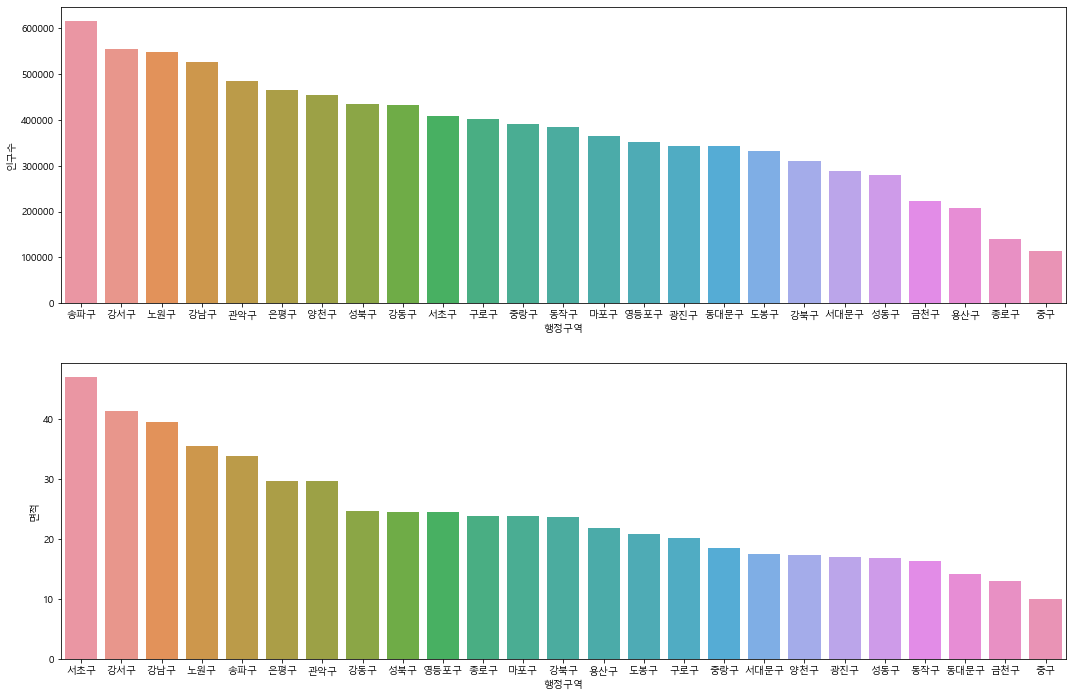

In [142]:
# Figure와 Axes 생성
figure,(axes1, axes2) = plt.subplots(nrows=2, ncols=1)
# figure size 조절
figure.set_size_inches(18, 12)

sns.barplot(x='행정구역', y='인구수', data=seoul_df.sort_values(by='인구수',ascending=False),\
            ax=axes1)
sns.barplot(x='행정구역', y='면적', data=seoul_df.sort_values(by='면적',ascending=False),\
            ax=axes2)

In [143]:
def show_barplot(sido_name):
    sido_df = data.loc[data['광역시도'] == sido_name]
    # Figure와 Axes 생성
    figure,(axes1, axes2) = plt.subplots(nrows=2, ncols=1)
    # figure size 조절
    figure.set_size_inches(18, 12)

    pop_plot = sns.barplot(x='행정구역', y='인구수', data=sido_df.sort_values(by='인구수',ascending=False),\
                ax=axes1)
    pop_plot.set_title(f'{sido_name}의 행정구역별 인구수')
    
    area_plot = sns.barplot(x='행정구역', y='면적', data=sido_df.sort_values(by='면적',ascending=False),\
                ax=axes2)
    area_plot.set_title(f'{sido_name}의 행정구역별 면적')

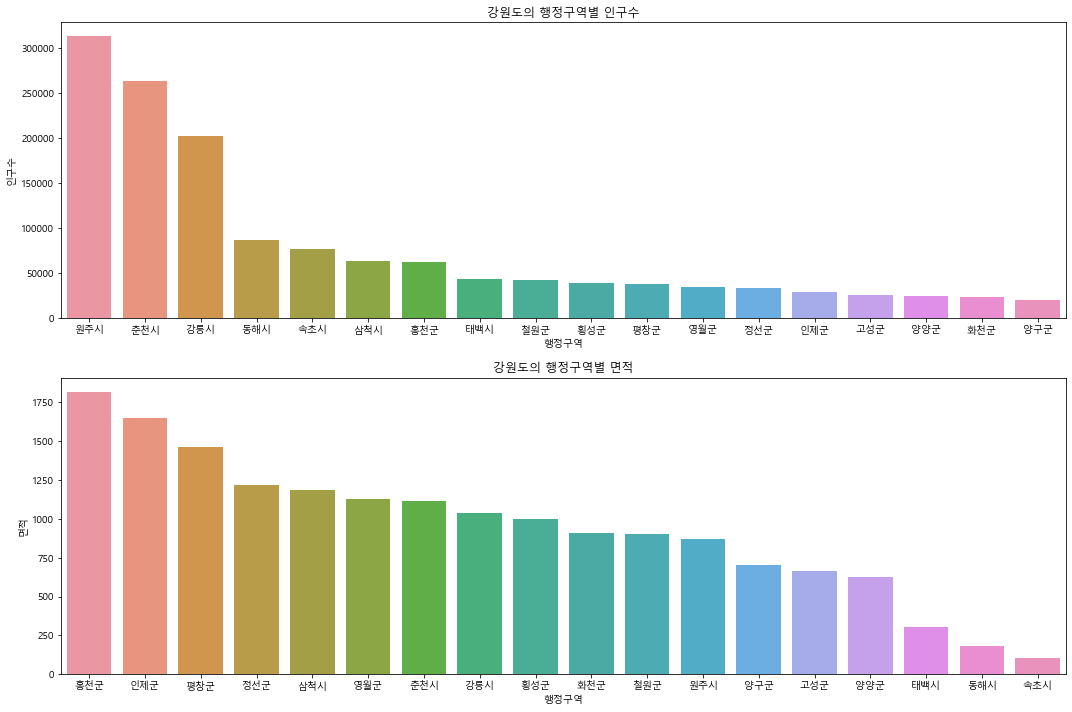

In [144]:
show_barplot('강원도')

In [ ]:
# 전국의 광역시도별 인구수 
figure, axes1 = plt.subplots(nrows=1, ncols=)